# Open CV

Welcome to this tutorial on OpenCV (Open Source Computer Vision Library)<br>
OpenCV is one of the most popular open-source libraries for computer vision, image processing, and machine learning. It provides a wide range of tools to work with images and videos, making it widely used in fields such as:
- Image and video processing and filtering
- Object detection and tracking
- Robotics and autonomous systems
- Machine learning and deep learning applications
- and more

Why OpenCV?
- Free and open-source
- Fast and optimized for real-time applications
- Large community and extensive documentation
- Works with Python, C++, and other languages

**Contact me:**  
- GitHub: [yasinpurraisi](https://github.com/yasinpurraisi)  
- Email: yasinpourraisi@gmail.com  
- Telegram: [yasinprsy](https://t.me/yasinprsy)


### Requirements
Before getting started, make sure the following Python libraries are installed

In [ ]:
!pip install opencv-python numpy matplotlib pillow


### Read,Write and Display images

In [35]:
# import Open CV library
import cv2

# Load image
im = cv2.imread("images\Cat.jpg")

# Display image
cv2.imshow("Cat",im)

cv2.waitKey()
cv2.destroyAllWindows()

### type and shape

In [36]:
print(f"im type : {type(im)}")
print(f"im shape (height,width,channels) : {im.shape}")

im type : <class 'numpy.ndarray'>
im shape (height,width,channels) : (350, 280, 3)


### write image
- <code>JPG</code> : a lossy format that compresses images by discarding some details, resulting in smaller file sizes but lower fidelity. Best for photos and natural images where exact pixel accuracy isn’t critical.

- <code>PNG</code> : a lossless format that preserves every pixel exactly, often producing larger files. It supports transparency and is ideal for graphics, text, or images that require sharp detail.

In [37]:
# cv2.imwrite("output-name.outputformat", im)
cv2.imwrite("output_cat.jpg", im)
cv2.imwrite("output_cat.png", im)

True

### Matplotlib
in OpenCV images load as BGR(instead of RGB)

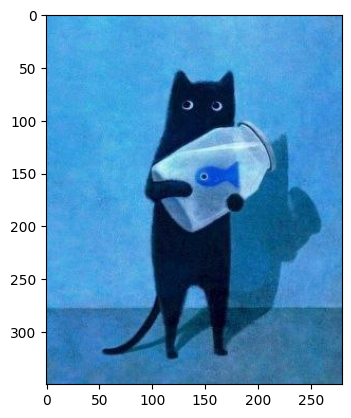

In [38]:
import matplotlib.pyplot as plt

plt.imshow(im)

convert image to RGB

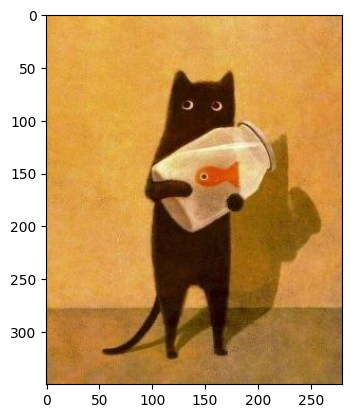

In [39]:
# cv2.cvtColor(input image,switch)
RGB_im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)

read image in RGB

In [40]:
im = cv2.imread("images/Cat.jpg",cv2.IMREAD_COLOR_RGB)

### Changing pixel values

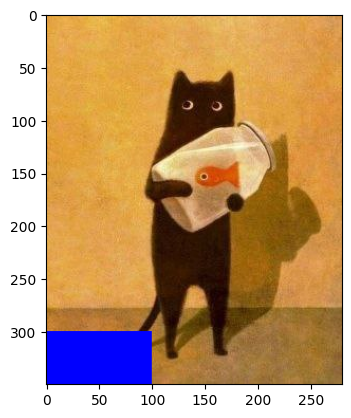

In [41]:
RGB_im[300:400,:100,:]= (0,0,255)

plt.imshow(RGB_im)

### Greyscale images

Greyscale image shape : (350, 280)


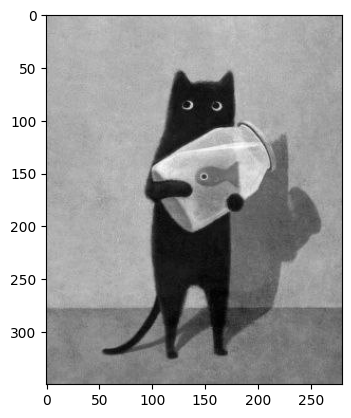

In [43]:
im = cv2.imread("images/Cat.jpg")
# convert to Greyscale
grey_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

# read in Greyscale
grey_im1 = cv2.imread("images/Cat.jpg",cv2.IMREAD_GRAYSCALE)

# Greyscale shape : (height,width) and one channel (0-255)
print(f"Greyscale image shape : {grey_im.shape}")

#plot image
plt.imshow(grey_im1,cmap="gray")

### Cropping image

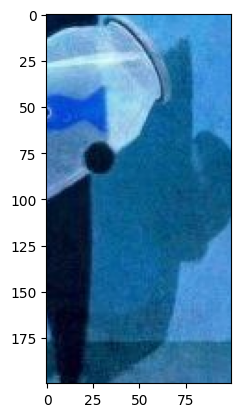

In [47]:
cropped_im = im[100:300,150:250]

plt.imshow(cropped_im)